<a href="https://colab.research.google.com/github/JacksonLIew101/CPT115_Assignment_ImageTransformation/blob/main/Group33_CPT115_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphics transformation through matrix
> This is the start of the CPT115 assignment 1 from Group 33


*   Liew Man Hong
*   Kristal Tan
*   Khoo Lay Sin
*   Lim Jie Yi






# READ ME FIRST


## First, Import image file to Google Colab

Check the submission folder and drag the 'Apple.jpg' to the folder tab in the Google Colab.

## Usage

```
1. Make sure 'Apple.jpg' is in the folder tab before starting
2. Go to Runtime on the top menu
3. Select Run all
4. Input the necessary values for the graphics transformation
```

## Section for each matrix transformation

Each transformation will comes with a simple discussion regarding the implementation, definition of the transformation function and calling the function.

1. Translation Transformation
2. Rotation Transformation
3. Scaling Transformation
3. Reflection Transformation
4. Shear Transformation


In [ ]:
#Load the necessary library
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import string

The image is saved into this format: 
 <class 'numpy.ndarray'>
The shape of the image : 
 (507, 513, 3)


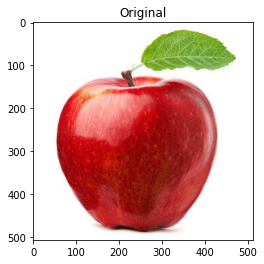

In [ ]:
#Loading the image using Matplotlib
img = plt.imread('Apple.jpg')

#Print out the type of the image variable
print('The image is saved into this format: \n',type(img))
#print out the shape of the image
print('The shape of the image : \n',img.shape)

#Show the image
plt.imshow(img)
plt.title('Original')
plt.show()

For coding of computer graphic, we need to deal with each pixel of in the image when doing matrix transformation for image. As image array size of (height, width, 3), we need to find the coordinate and the transformed coordinate before inserting each image pixel to the transformed image array. 

In [ ]:
'''
  For Translation
'''
def translation_img(src_img, shift_distance,shape_of_out_img):
  height = src_img.shape[0]
  width = src_img.shape[1]
  x_distance = shift_distance[0]
  y_distance = shift_distance[1]

  #Create translation matrix
  ts_mat = np.array([[1,0,x_distance],[0,1,y_distance]])
  
  ##Create an new image array filled with zeros
  out_img = np.zeros(shape_of_out_img,dtype='u1')

  #Use for loop shift each image pixel
  for i in range(height):
    for j in range(width):
      origin_x = j
      origin_y = i
      origin_xy = np.array([origin_x, origin_y,1])

      #Use scalar product to find the new location for each pixel
      new_xy = np.dot(ts_mat,origin_xy)
      new_x = new_xy[0]
      new_y = new_xy[1]

      #Check to prevent any errors in the processing
      if 0<new_x<width and 0<new_y<height:
        out_img[new_y,new_x] = src_img[i,j]

  #Make sure to change the output image to array data type
  shifted_img=np.array(out_img)

  return shifted_img

Translation of the graphics

The image below is shifted 100 to the right and 100 to the bottom


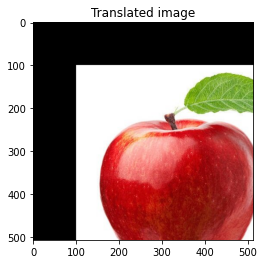

In [ ]:
print('Translation of the graphics')
print('\nThe image below is shifted 100 to the right and 100 to the bottom')

#Set the translated distance to x=100, y=100
shift_distance = (100,100)
translated_img = translation_img(img, shift_distance, img.shape)

#Display the translated image
plt.imshow(translated_img)
plt.title('Translated image')
plt.show()

For rotation transformation, we need to set the center first as we want to rotate via the center only. Also, to account for each pixel, we use two equations to find new x-coordinates and new y-coordinates instead of multiplying matrices together. It can ensure us to make sure of the rotated coordinates before inserting each image pixels.

In [ ]:
'''
  This is for the rotation
  Reference: Rotating Image By Any Angle(Shear Transformation) Using Only NumPy by Gautam Agrawal
  Link     : https://gautamnagrawal.medium.com/rotating-image-by-any-angle-shear-transformation-using-only-numpy-d28d16eb5076
'''
def rotation_img(src_img):
  
  #Get input for angle
  while True:
    try:
        angle = int(input("Enter the degree for the rotation: "))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #Return to the start of the loop
        continue
    else:
        #We're ready to exit the loop.
        break

  theta = np.radians(angle)
  cos = np.cos(theta)
  sin = np.sin(theta)
  height = src_img.shape[0]
  width = src_img.shape[1]

  #Find the height and width of the new image
  new_height = round(abs(src_img.shape[0]*cos)+abs(src_img.shape[1]*sin))+1
  new_width = round(abs(src_img.shape[1]*cos)+abs(src_img.shape[0]*sin))+1

  #Create an new image array filled with zeros
  out_img = np.zeros((new_height,new_width,src_img.shape[2]))

  #Find the centre of the original image about which we have to rotate the image
  original_centre_height = round(((src_img.shape[0]+1)/2)-1)
  original_centre_width = round(((src_img.shape[1]+1)/2)-1)

  #Find the centre of the new image 
  new_centre_height = round(((new_height+1)/2)-1)     
  new_centre_width = round(((new_width+1)/2)-1)  

  for i in range(height):
    for j in range(width):

        #Get the co-ordinates of pixel with respect to the centre of original image
        y=src_img.shape[0]-1-i-original_centre_height                   
        x=src_img.shape[1]-1-j-original_centre_width                      

        #Get the new co-ordinates of pixel after rotation
        new_x=round(x*cos+y*sin)
        new_y=round(-x*sin+y*cos)

        #Adjust the new co-ordinates with respect to the centre of new image because the centre will change after rotation
        new_x=new_centre_width-new_x
        new_y=new_centre_height-new_y

        #Check to prevent any errors in the processing
        if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
            out_img[new_y,new_x,:]=src_img[i,j,:]

  #Convert image array to image file
  rotated_img=Image.fromarray((out_img).astype(np.uint8))

  return rotated_img

Rotation of the graphics
Enter the degree for the rotation: 90


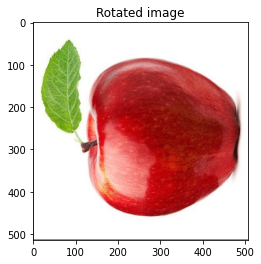

In [ ]:
print("Rotation of the graphics")
rotated_img = rotation_img(img)

#show the image
plt.imshow(rotated_img)
plt.title('Rotated image')
plt.show()

For scaling transformation, each pixel only being shifted to new coordinate. After scaling, there will be empty pixel in between. To overcome the issue, Interpolation function like Nearest Neighbour Interpolation is needed to smoothen up the image pixels. We are unable to scale image because lack of Interpolation function for scaled image. Hence, we use plots on graphs to demonstrate the scaling of graphics as a replacement.

Image is scaled to 1000x1000 image from original 500x500 image 
But, the image is not clear


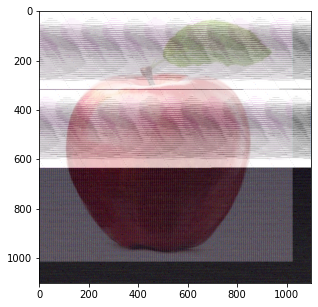

In [ ]:
'''
  Failed case for scaling of graphics
'''

print('Image is scaled to 1000x1000 image from original 500x500 image \nBut, the image is not clear')

#Create scaling matrix with scale = 2
scaling_mat = np.array([[2,0,0], [0,2,0], [0,0,1]])

#Create a new image array with zeros
scaled_img = np.empty((1100, 1100, 3), dtype=np.uint8)

#Scale the image pixel to the right co-ordinates
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = scaling_mat @ input_coords
        scaled_img[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(scaled_img)
plt.show()

In [ ]:
'''
  For Scaling
  Reference:Affine Image Transformations in Python with Numpy, Pillow and OpenCV by Adam McQuistan
  Link     :https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/
'''

def scale_graphic(plots):

  while True:
    try:
        scale = float(input('Scale ratio: '))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #Return to the start of the loop
        continue
    
    if scale<-4 or scale>4:
        print("Sorry, your range should be within -4 and 4.")
        #Return to the start of the loop
        continue
    else:
        #We're ready to exit the loop.
        break

  #Creating scaling transformation matrix
  scaling_mat = np.array([[scale,0,0], [0,scale,0], [0,0,1]])

  #Create identity matrix
  I = np.eye(3)
  
  #Set the colors for the points
  color_lut = 'rgbc'

  #Get the axis of the graph
  ax = plt.gca()

  #Get the initial plots into another array first
  xs = []
  ys = []
  for row in plots:
      output_row = I @ row
      x, y, i = output_row
      xs.append(x)
      ys.append(y)
      i = int(i) # convert float to int for indexing
      c = color_lut[i]
      plt.scatter(x, y, color=c)
      plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
  xs.append(xs[0])
  ys.append(ys[0])
  
  #Create empty array for the scaled graphics
  x_scaled = []
  y_scaled = []
  
  #Find the new co-ordinates of the scaled graphics
  for row in A:

    #Do matrix multiplication using @ as operator
    output_row = scaling_mat @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    x_scaled.append(x_s)
    y_scaled.append(y_s)

    #Convert to int for indexing
    i, i_s = int(i), int(i_s) 

    #Set the color ranges
    c, c_s = color_lut[i], color_lut[i_s]

    #Plot the points
    plt.scatter(x,y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}")

  #Modify the points
  x_scaled.append(x_scaled[0])
  y_scaled.append(y_scaled[0])

  print('The shape in dashed line is the scaled graphics')

  #Plot the outline shapes for original graphics and scaled graphics
  plt.plot(xs, ys, color="gray", linestyle='solid')
  plt.plot(x_scaled, y_scaled, color="gray", linestyle='dotted')

  #Set the x-axis and y-axis values
  ax.set_xticks(np.arange(-5.0,5,1))
  ax.set_yticks(np.arange(-5.0,5,1))

  #Show the plots
  plt.grid()
  plt.show()

Scaling of graphics (Demonstrated in plots)
Scale ratio: 2
The shape in dashed line is the scaled graphics


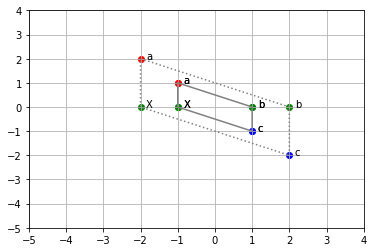

In [ ]:
  print('Scaling of graphics (Demonstrated in plots)')
  A = np.array([[-1,1,0],[1,0,1],[1,-1,2],[-1,0,-3]])
  scale_graphic(A)

For reflection of graphics, we flip the pixels in the image array to demonstrate the transformation. It is because we are unable to use matrix transformation as the images will be blur. If we are to use matrix, scaling matrix with different scales for x-values and y-values is used.

In [ ]:
'''
  For Reflection
'''
def reflection_img(src_img):
  #Get input for type of reflectoin
  while True:
    try:
        direction = int(input('How do you want to reflect your image?\n1. Around x-axis\n2. Around y-axis\nInput: '))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #Return to the start of the loop
        continue

    if direction not in (1,2):
        print("Sorry, invalid choice.")
        #Return to the start of the loop
        continue
    else:
        #We're ready to exit the loop.
        break
        
  if(direction==1):
    #Flip around x-axis
    reflected_img = np.flip(src_img,0)
    #plt.subplot(r,c) provide the number of rows and columns
    f, axarr = plt.subplots(2,1) 

    #Use the created array to output multiple images in one column
    axarr[0].imshow(src_img)
    axarr[1].imshow(reflected_img)
  else:
    #Flip around y-axis
    reflected_img = np.flip(src_img,1)
    #plt.subplot(r,c) provide the number of rows and columns
    f, axarr = plt.subplots(1,2) 

    #use the created array to output your multiple images in one row
    axarr[0].imshow(reflected_img)
    axarr[1].imshow(src_img)

Reflection of graphics
How do you want to reflect your image?
1. Around x-axis
2. Around y-axis
Input: 1，2
Sorry, I didn't understand that.
How do you want to reflect your image?
1. Around x-axis
2. Around y-axis
Input: 1


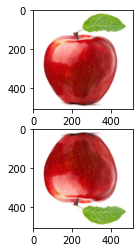

In [ ]:
print("Reflection of graphics")
reflection_img(img)

Shear of graphics is the modification of rotation function because tangent values are involved instead of cosine and sine values. Also, we limit the angles of inputs. This is because the image is squeezed until non-visible for 45 degree and the image is rotated completely for angles larger than 45. 

In [ ]:
'''
  For shear
'''
def shear_img(image):

  #Get two angles
  print('Try angle value less than 35, e.g. 15')

  while True:
    try:
        h_angle = -int(input('Horizontal angle: '))
        v_angle = -int(input('Vertical angle  : '))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #Return to the start of the loop
        continue

    if (-h_angle) < 0 or (-h_angle) > 35 or (-v_angle) < 0 or (-v_angle) > 35:
        print("Sorry, invalid values.")
        #Return to the start of the loop
        continue
    else:
        #We're ready to exit the loop.
        break

  #Convert degrees to radians
  h_angle=np.radians(h_angle)                               
  v_angle=np.radians(v_angle)

  #Find the height and width of the original image
  height=image.shape[0]                                   
  width=image.shape[1]                            

  #Find the height and width of the new image
  new_height  = round(abs(image.shape[0])+abs(image.shape[1]*np.tan(h_angle)))+1
  new_width  = round(abs(image.shape[1])+abs(image.shape[0]*np.tan(v_angle)))+1

  #Create a new image array with zeros
  output_img=np.zeros((new_height,new_width,image.shape[2]))   

  #Find the centre of the original image
  original_centre_height = round(((image.shape[0]+1)/2)-1)    
  original_centre_width = round(((image.shape[1]+1)/2)-1)    

  #Find the centre of the new image after shear of graphics
  new_centre_height= round(((new_height+1)/2)-1)        
  new_centre_width= round(((new_width+1)/2)-1)         

  #Find the new co-ordinates for each pixel after shear transformation
  for i in range(height):
      for j in range(width):

          #Get the Co-ordinates of pixel with respect to the centre of original image
          y=image.shape[0]-1-i-original_centre_height                   
          x=image.shape[1]-1-j-original_centre_width 

          #Apply shear transformation                     
          '''
          h_angle is the angle between the x-axis and the graphic
          v_angle is the angle between the y-axis and the graphic
          The matrix involved are:
          |  1     tan b | |x|  
          |tan a     1   | |y| 
          '''
          new_x=round(x+y*np.tan(v_angle))
          new_y=round(y+x*np.tan(h_angle))

          #Adjust the new co-ordinates with respect to the centre of new image because the centre will change after rotation
          new_y=new_centre_height-new_y
          new_x=new_centre_width-new_x
          
          #Input the pixels to the new image array
          output_img[new_y,new_x,:]=image[i,j,:]                          

  #Convert array to image
  sheared_img=Image.fromarray((output_img).astype(np.uint8))                       

  return sheared_img

Shear of graphics
Try angle value less than 35, e.g. 15
Horizontal angle: 15
Vertical angle  : 15


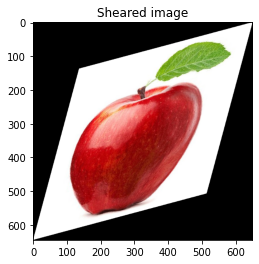

In [ ]:
print("Shear of graphics")
sheared_img = shear_img(img)

#show the image
plt.imshow(sheared_img)
plt.title('Sheared image')
plt.show()

For Homogenous Coordinate, we only use translation and rotation for simple demonstration on how different graphic transformation can be done together. 

Homogenous Coordinate System is demonstrated using translation and rotation only
Enter the degree for the rotation: 90


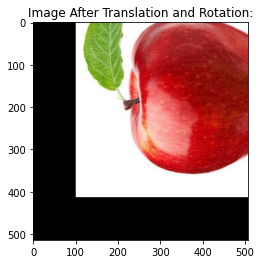

In [ ]:
print("Homogenous Coordinate System is demonstrated using translation and rotation only")
 
#Translate the image, then rotate the image
shift_distance = (100,100)
final_img = rotation_img(translation_img(img, shift_distance, img.shape))
 
#Show the image
plt.imshow(final_img)
plt.title('Image After Translation and Rotation:')
plt.show()